## ✂️ 텍스트 전처리 핵심 요약

#### 🧩 1️⃣ 문장 토큰화 (Sentence Tokenization)
- **함수:** `sent_tokenize()`
- **역할:** 문단을 문장 단위로 나눔  
- **기본 로직:**
  - 마침표(`.`), 느낌표(`!`), 물음표(`?`) → 문장 끝 후보로 인식  
  - 약어(`Dr.`, `Mr.`, `U.S.A.` 등) 학습  
  - 문장 시작이 대문자인지 확인  
  - 통계적 모델을 사용해 실제 문장 경계 판단  
- **특징:**  
  - 다국어 지원  
  - 약어와 문장 끝을 구분하는 **기계학습 모델 내장**

---

#### 🔠 2️⃣ 단어 토큰화 (Word Tokenization)
- **역할:** 문장을 단어 단위로 분리  

  ##### ✅ 규칙 기반 (Rule-based)
  - 공백 기준으로 단어 분리  
  - 구두점(`, . ? !`)을 별도 토큰으로 분리  
  - 축약형 처리 → `"it's"` → `["it", "'s"]`  
  - 소유격 처리 → `"Let's"` → `["Let", "'s"]`

  ##### ✅ 구두점 기반 (`WordPunctTokenizer`)
  - 모든 구두점을 분리함  
  - `"It's"` → `["It", "'", "s"]`

  ##### ✅ 정규표현식 기반 (`RegexpTokenizer`)
  - 정규표현식(Regex)으로 직접 규칙 정의 가능  
    예: 특정 기호 제거, 숫자 제외 등  

---

#### 🧹 3️⃣ 노이즈 및 불용어 제거
- **목적:** 의미 없는 단어(예: “the”, “a”, “이”, “그”) 제거  

##### 주요 방법
- **set 구조:** 중복 제거  
- **List Comprehension:** 조건으로 필터링  
- **NLTK 불용어 사전:** `from nltk.corpus import stopwords`  
  - 예시:  
    ```python
    stop_words = set(stopwords.words('english'))
    words = [w for w in tokens if w not in stop_words]
    ```

---

#### 💡 추가 참고
| 도구 | 역할 | 예시 |
|------|------|------|
| `sent_tokenize` | 문장 분리 | `"Hello. How are you?"` → `["Hello.", "How are you?"]` |
| `word_tokenize` | 단어 분리 | `"I'm happy!"` → `["I", "'m", "happy", "!"]` |
| `WordPunctTokenizer` | 구두점 분리 | `"He's fine."` → `["He", "'", "s", "fine", "."]` |
| `RegexpTokenizer` | 사용자 지정 패턴 | 숫자, 기호 제거 등 |

---

> 🧠 **요약:**  
> 텍스트 분석의 첫 단계는 "토큰화"  
> - 문장 → `sent_tokenize()`  
> - 단어 → `word_tokenize()`  
> 이후 노이즈와 불용어 제거로 **의미 있는 단어만 남기는 것**이 핵심!



In [1]:
%conda install nltk

2 channel Terms of Service accepted
Channels:
 - defaults
Platform: osx-arm64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.9.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2025.10.5          |  py313hca03da5_0         157 KB
    nltk-3.9.2                 |  py313ha2b9d59_0         3.9 MB
    ------------------------------------------------------------
                                           Total:         4.1 MB

The following packages will be UPDATED:

  ca-certificates                      2025.2.25-hca03da5_0 --> 2025.11.4-hca03da5_0 
  certifi                         2025.4.26-py313hca03da5_0 --> 2025.10.5-py31

In [2]:
from nltk.tokenize import sent_tokenize
import nltk

In [3]:
nltk.download('wordnet')
nltk.download('webtext')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kangminji/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     /Users/kangminji/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kangminji/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/kangminji/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
sentence = "Hello everyone. It's good to see you. Let's start our text mining class"
sent_tokenize(sentence)

['Hello everyone.',
 "It's good to see you.",
 "Let's start our text mining class"]

In [5]:
sentence_kor = '안녕하세요, 여러분. 만나서 반갑습니다. 이제 학습을 시작해 볼까요?'
sent_tokenize(sentence_kor)

['안녕하세요, 여러분.', '만나서 반갑습니다.', '이제 학습을 시작해 볼까요?']

In [6]:
from nltk.tokenize import word_tokenize
word_tokenize(sentence_kor)

['안녕하세요', ',', '여러분', '.', '만나서', '반갑습니다', '.', '이제', '학습을', '시작해', '볼까요', '?']

In [7]:
from nltk.tokenize import WordPunctTokenizer
WordPunctTokenizer().tokenize(sentence)

['Hello',
 'everyone',
 '.',
 'It',
 "'",
 's',
 'good',
 'to',
 'see',
 'you',
 '.',
 'Let',
 "'",
 's',
 'start',
 'our',
 'text',
 'mining',
 'class']

In [8]:
# 정규식토큰화
import re
re.findall("[abc]", "how ard you, boy")

['a', 'b']

In [9]:
# 노이즈와 불용어 제거
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
english_stops = stopwords.words('english')
test1 = "Sorry, I couldn't go to movie yesterday"
# tokens = word_tokenize(test1)
tokenizer = RegexpTokenizer("[\\w']+")
tokens = tokenizer.tokenize(test1.lower())

[token for token in tokens if token not in english_stops  ]

['sorry', 'go', 'movie', 'yesterday']

In [ ]:
# 정규식토큰화
import re
re.findall("[abc]", "how ard you, boy")

In [ ]:
# 노이즈와 불용어 제거
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
english_stops = stopwords.words('english')
test1 = "Sorry, I couldn't go to movie yesterday"
# tokens = word_tokenize(test1)
tokenizer = RegexpTokenizer("[\\w']+")
tokens = tokenizer.tokenize(test1.lower())

[token for token in tokens if token not in english_stops  ]

In [10]:
# 소문자 a~z로 이루어진 문자열에서 4글자이상
RegexpTokenizer("[a-z]{4,}")

RegexpTokenizer("[\\w']{3,}")  # 3글자 이상


RegexpTokenizer("[\\w]")  # 어포스트로피를 패턴에서 제외   can't   can t


RegexpTokenizer(pattern='[\\w]', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [ ]:
# 어간 추출(Stemming)
# 줄기 stem 단어에서 불필요한 요소를 제거하고 남는 핵심 형태
# 단어는 다양한 형태 / 복수형 과겨형과 같은 시제 변환, 복수형

In [2]:
%pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install JPYpe1

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmer.stem('cooking'), stemmer.stem('cookery'), stemmer.stem('cookbooks')

In [ ]:
# PorterStemmer 규칙기반이라서 완벽하지 못함 --> 속도가 빠름, 의미가 달라질수 도 있음

In [ ]:
# 표제어 추출  Lemmatization
# Lemma  단어의 사전 기본형
# 단어의 변형(시제,복수,비교급) 제거하고 사전(headword)에 나오는 정확한 원형으로 바꾸는 과정
# 어간처럼 단어줄기가 아니라 , 맥락과 품사를 고려한 올바른 형태
# better(더 좋은) ->표제어  good(좋은)
# 먹었다 --> 먹다(동사 원형)
# 알고리즘 : 형태소 분석기(konlpy) 를 사용해 품사(명사,동사)를 보고 정확히 변환 

In [ ]:
# 주요목적
    # 어간추출처럼 대충 줄이지 않고 맥락에 맞는 정확한 단어로 만들어서 NLP 품질 향상
    # 단점  사전에 의존해서 언어/맥락 제한

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print( lemmatizer.lemmatize('cooking'))  # 기본이 명사로 인식
print(lemmatizer.lemmatize('cooking',pos='v'))  # 품사를 동사(v)

In [ ]:
lemmatizer.lemmatize('better', pos='a')

In [ ]:
# 품사 태깅
import nltk
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger_eng')

tokens = "hello everyone. It's good to see you. Let's start out text mining calss!"
tokens = word_tokenize(tokens)
nltk.pos_tag(tokens)

In [ ]:
# 특정 품사 추출   명사 동사 형용사
tag_lists = ['NN','VB','JJ']
[word for word,tag in nltk.pos_tag(tokens) if tag in tag_lists]

In [ ]:

from konlpy.tag import Okt
t = Okt()

In [9]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/kangminji/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [10]:
import nltk
from nltk.tokenize import word_tokenize
sentence = '''절망의 반대가 희망은 아니다.
어두운 밤하늘에 별이 빛나듯
희망은 절망 속에 싹트는 거지
만약에 우리가 희망함이 적다면
그 누가 세상을 비출어줄까.
정희성, 희망 공부'''

tokens = word_tokenize(sentence)
print(tokens)
print(nltk.pos_tag(tokens))

['절망의', '반대가', '희망은', '아니다', '.', '어두운', '밤하늘에', '별이', '빛나듯', '희망은', '절망', '속에', '싹트는', '거지', '만약에', '우리가', '희망함이', '적다면', '그', '누가', '세상을', '비출어줄까', '.', '정희성', ',', '희망', '공부']
[('절망의', 'JJ'), ('반대가', 'NNP'), ('희망은', 'NNP'), ('아니다', 'NNP'), ('.', '.'), ('어두운', 'VB'), ('밤하늘에', 'JJ'), ('별이', 'NNP'), ('빛나듯', 'NNP'), ('희망은', 'NNP'), ('절망', 'NNP'), ('속에', 'NNP'), ('싹트는', 'NNP'), ('거지', 'NNP'), ('만약에', 'NNP'), ('우리가', 'NNP'), ('희망함이', 'NNP'), ('적다면', 'NNP'), ('그', 'NNP'), ('누가', 'NNP'), ('세상을', 'NNP'), ('비출어줄까', 'NNP'), ('.', '.'), ('정희성', 'NN'), (',', ','), ('희망', 'NNP'), ('공부', 'NNP')]


In [ ]:
# 그래프와 워드 클라우드
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg # 쿠텐버그 말뭉치 중에 이상한 나라의 앨리스 텍스트 로드


# 1. 데이터 로드
gutenberg.fileids()
doc_alice = gutenberg.open('carroll-alice.txt').read()
print(doc_alice)

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/kangminji/nltk_data...


[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice think it so
VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!
Oh dear! I shall be late!' (when she thought it over afterwards, it
occurred to her that she ought to have wondered at this, but at the time
it all seemed quite natural); but

[nltk_data]   Unzipping corpora/gutenberg.zip.


In [ ]:
# 2. 토큰화 및 전처리
from nltk.tokenize import word_tokenize
tokens_alice = word_tokenize(doc_alice)
print(f'{len(tokens_alice)}')


from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\\w]{3,}") # 3글자까지만 !
reg_alice = tokenizer.tokenize(doc_alice.lower())
print(f'{len(reg_alice)}')

33535
21221


In [ ]:
# 3. 불용어 제거
from nltk.corpus import stopwords
english_stops = set(stopwords.words('english'))
result_alice = [ word for word in reg_alice if word not in english_stops ]
len(result_alice)

12105

In [16]:
# 4. 품사 태깅 및 필터링 (명사 동사 형용사만)
my_tag_set = [ 'NN' , 'VB' , 'VBD' , 'JJ']
my_word = [ word for word , tag in nltk.pos_tag(reg_alice) if tag in my_tag_set ]

In [17]:
my_word

['alice',
 'carroll',
 'chapter',
 'rabbit',
 'hole',
 'alice',
 'was',
 'get',
 'tired',
 'sister',
 'bank',
 'nothing',
 'had',
 'book',
 'sister',
 'was',
 'had',
 'use',
 'book',
 'thought',
 'conversation',
 'was',
 'own',
 'mind',
 'well',
 'hot',
 'day',
 'made',
 'feel',
 'sleepy',
 'stupid',
 'pleasure',
 'daisy',
 'chain',
 'worth',
 'trouble',
 'white',
 'rabbit',
 'pink',
 'ran',
 'was',
 'nothing',
 'remarkable',
 'did',
 'think',
 'way',
 'rabbit',
 'dear',
 'late',
 'thought',
 'occurred',
 'have',
 'time',
 'seemed',
 'quite',
 'natural',
 'rabbit',
 'took',
 'watch',
 'waistcoat',
 'pocket',
 'looked',
 'hurried',
 'alice',
 'started',
 'flashed',
 'mind',
 'had',
 'rabbit',
 'waistcoat',
 'pocket',
 'watch',
 'take',
 'curiosity',
 'ran',
 'field',
 'was',
 'time',
 'see',
 'large',
 'rabbit',
 'hole',
 'hedge',
 'moment',
 'went',
 'alice',
 'world',
 'was',
 'get',
 'rabbit',
 'hole',
 'went',
 'tunnel',
 'way',
 'dipped',
 'alice',
 'had',
 'moment',
 'found',
 'we

In [ ]:
from collections import Counter  # 데이터(리스트·딕셔너리 등)를 다루는 도구들을 더 편리하게 확장해주는 모듈
Counter(my_word)

Counter({'said': 462,
         'was': 357,
         'alice': 306,
         'had': 175,
         'little': 122,
         'were': 85,
         'went': 83,
         'queen': 74,
         'time': 71,
         'did': 63,
         'thought': 58,
         'began': 58,
         'turtle': 57,
         'way': 56,
         'mock': 56,
         'hatter': 55,
         'king': 55,
         'gryphon': 55,
         'rabbit': 51,
         'head': 50,
         'thing': 49,
         'voice': 47,
         'looked': 44,
         'mouse': 42,
         'duchess': 42,
         'such': 41,
         'came': 40,
         'other': 40,
         'get': 39,
         'see': 39,
         'great': 39,
         'don': 39,
         'have': 38,
         'tone': 38,
         'cat': 37,
         'dormouse': 37,
         'nothing': 34,
         'got': 34,
         'large': 33,
         'first': 33,
         'last': 33,
         'march': 33,
         'moment': 31,
         'white': 30,
         'door': 30,
         'hare': 30

In [19]:
sorted_word_count = dict( Counter(my_word) )

In [20]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


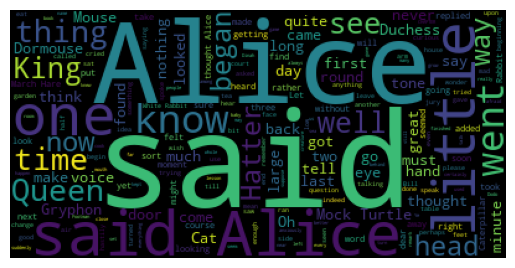

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud().generate(doc_alice)
plt.axis('off') # 행 열 제거 !
plt.imshow(wordcloud)
plt.show()

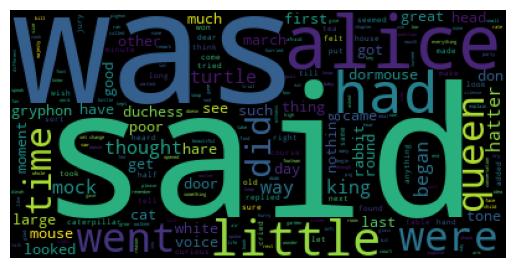

In [ ]:
wc = wordcloud.generate_from_frequencies(sorted_word_count)
plt.axis('off')
plt.imshow(wc)
plt.show()